|![RMIT logo](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTlAppozhCGl50pjgEZu_tTmalWJi3TjpNwCg&s)||
|-----|-------|
|Course|Foundations of Artificial Intelligence for STEM|
|Course Code|COSC2968/COSC3053|
|Lecturer(s)|Mr.Nhat-Quang Tran and Mrs.Anh Le Van|
|Full name - Student ID| Le Kim Quyen - s3983370|

# 1. Introduction
A delivery company using drones deliver packages in multiple addresses within a city. The drone is built based on AI program using A* (A star) algorithm. The program imports some libraries to support calculating.

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np # type: ignore

The ```math``` library support calculating with math, such as ```math.sqrt()``` return the square root of a number [1].

The ```matplotlib.pyplot``` and ```matplotlib.animation``` animate city maps in visualize [2].

# 2. Map Representation:
There are three different city maps presented by 2D array as a grid map where each element is a cell, 0 for empty or open space and 1 for obstacle or blocked space.
Assume every single day, the drone will flight on a single city map. The ```main()``` function will contain information of three different city maps and it will run when we call it and give an argument (a number: 1 or 2 or 3 to choose which maze will be run) in **Evaluation** below.

In [2]:
def main(mazeCity):
    # Given three different city maps correspond to the number of the mazeCity parameter
    if mazeCity == 1 or mazeCity == 2 or mazeCity == 3:
        # maze represents a city map as a grid with 1 is obstacle and 0 is walkable space
        # initialState = (x, y) illustrates coordinate of the start point
        # goalStares = [(x, y)] shows a list of multiple goal points that the drone need to reach
        if mazeCity == 1:
            maze = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
                    [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0],
                    [0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0],
                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0],
                    [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0],
                    [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
                    [0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
                    [0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
                    [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
                    [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1], 
                    [0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1],
                    [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0],
                    [0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0],
                    [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                    [1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0],
                    [1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                    [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                    [1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
                    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]]

            initialState = (0, 5)
            goalStates = [(0, 10), (1, 19), (5, 3), (12, 16), (14, 11), (16, 1), (19, 17)]
        elif mazeCity == 2:
            maze = [[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0],
                    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                    [0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                    [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                    [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
                    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
                    [0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0],
                    [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

            initialState = (0, 4)
            goalStates = [(1, 2), (1, 10), (9, 2), (9, 8), (10, 12)]
        else:
            maze = [[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0],
                    [0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0],
                    [0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1],
                    [0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0],
                    [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
                    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1],
                    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                    [0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
                    [0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
                    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
                    [1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0],
                    [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
                    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0],
                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]]

            initialState = (14, 15)
            goalStates = [(0, 21), (4, 3), (4, 10), (8, 7), (8, 15), (11, 24), (12, 17), (14, 2), (16, 8), (16, 11), (20, 10), (20, 21), (21, 1), (22, 13), (24, 1)]

        # A backup to ensure that initialState and goalStates are walkable
        # Print a notification and return None when initialState or goalStates is unwalkable
        for x in range(len(maze)):
            for y in range(len(maze[x])):
                if maze[x][y] != 0:
                    if (x, y) == initialState:
                        print('The start point is unwalkable')
                        return None, None, None
                    elif (x, y) in goalStates:
                        print('Some goal points is unwalkable')
                        return None, None, None

        # Return maze, initialState and goalStates when mazeCity is found
        return maze, initialState, goalStates
    else:
        # If the mazeCity is not equal 1 or 2 or 3
        print('Maze is not found')
        return None, None, None

## Each maze city map as image
There are five color points in the images shows five different role of each state.

**Yellow color** represents start point (as a cell)

**Red color** represents goal points (as cells)

**Blue color** represents path way (as cells, this will be seen in animation - visualize in **Evaluation** below)

**While color** represents walkable points (as cells)

**Black color** represents unwalkable points or obstacles (as cells)

**Map 1** (mazeCity = 1)

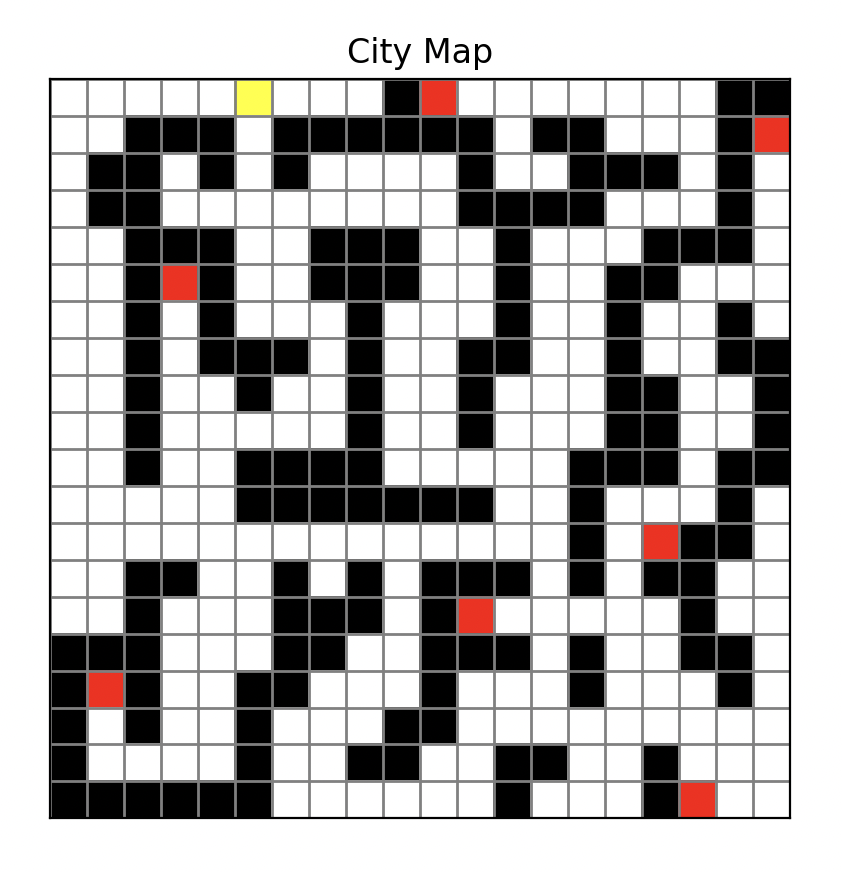

**Map 2** (mazeCity = 2)

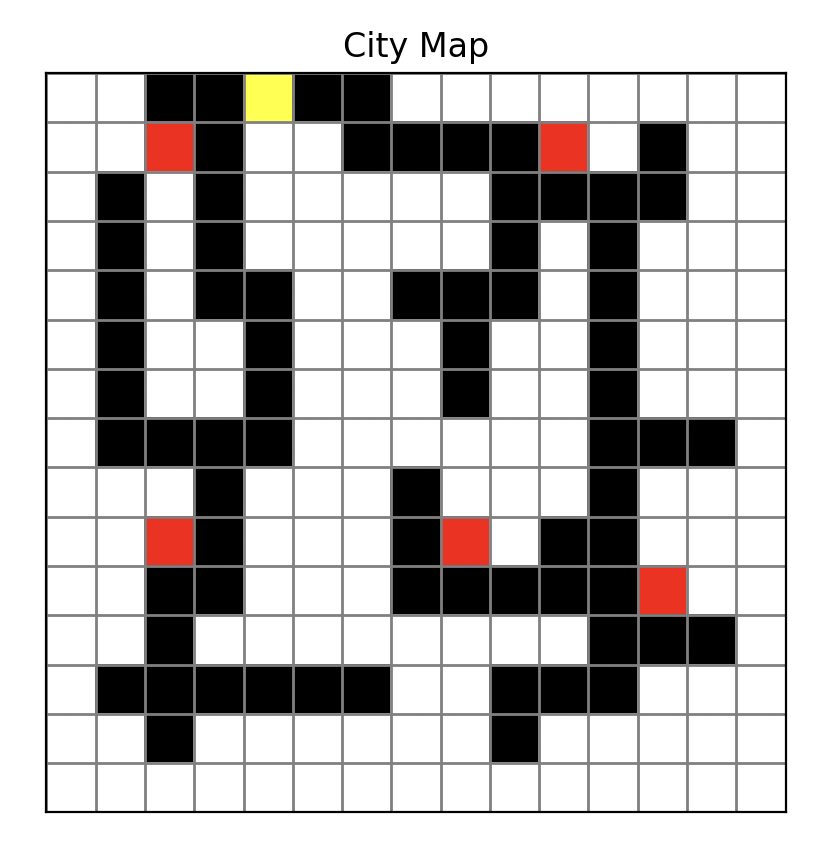

**Map 3** (mazeCity = 3)

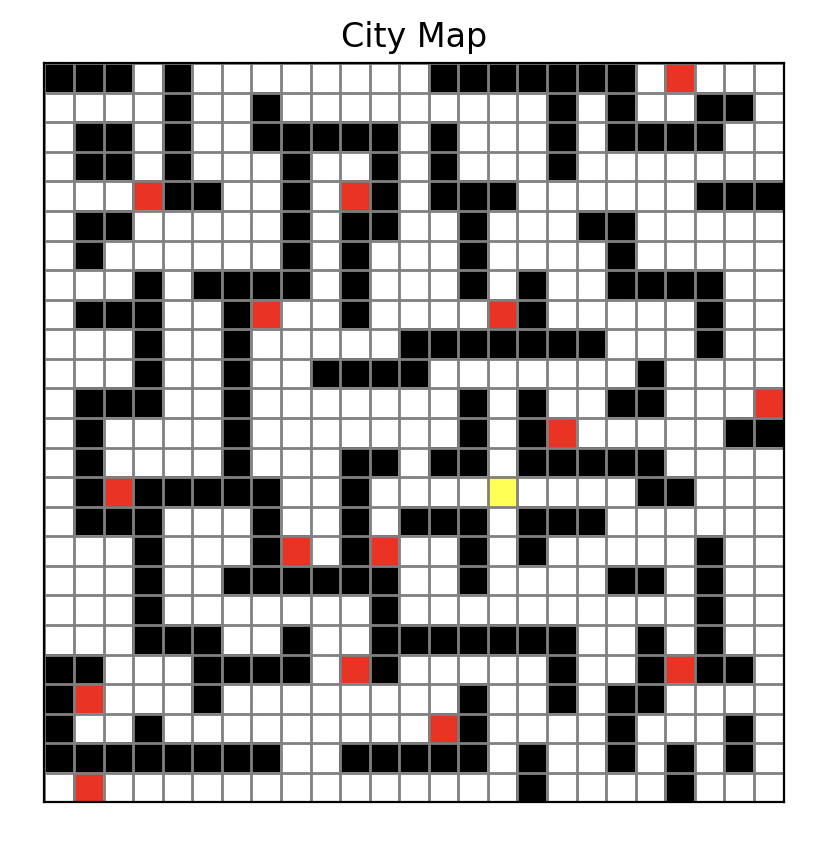

# 3. Heuristic Function:
**Distances Measure: Euclidean Distance** [3] was used in this A* implementation. This can be found in the ```getDistance()``` function, which calculates the distance between two nodes. Purposely, the obstacles are non-existent; this is because the true distance is a straight line from A to B. Thus, the distance between two elements is calculated based on the Pythagorean theorem [4]. Unlike Manhattan [5], Minkowski [6], or Chebyshev distances [7], Euclidean provides the shortest way, which means the drone will waste energy at the lowest cost. At the result, it brings a benefit of financial for its company.

In [3]:
def getDistance(stateA, stateB, stepCost = 1):
    # Calculate the distance difference between two points on each axis
    xDis = abs(stateA[0] - stateB[0]) * stepCost
    yDis = abs(stateA[1] - stateB[1]) * stepCost

    return math.sqrt(xDis ** 2 + yDis ** 2)

# 4. A* Implementation:
Beside ```aStar()``` function including the A* algorithm, there are some functions support A* implementation directly.

+ Firstly, ```Node()``` class provides a method to create an object for each cell represented in ```maze```, such as cell's position, cell's parent and cell's cost.

In [4]:
# Create a node class
class Node():
    def __init__(self, position = None, parent = None):
        # Identify position(x, y) and parent(Node) for each node
        self.position = position
        self.parent = parent

        # Assign init cost
        self.gCost = 0 # This is the path cost => the cost from start node to the current node
        self.hCost = 0 # This is the heuristic cost => the cost form the current node to the end(goal) node
        self.fCost = 0 # This is the evaluation function f(n) = g(n) + h(n)

+ Secondly, ```getPossibleNodes()``` function receive maze and currentNode as its parameters. This function will find out which node surrounding the currentNode is walkable and create a Node for that coordinate. At the end of this function, it returns a list that contains all the walkable nodes surrounding the currentNode.

In [5]:
def getPossibleNodes(maze, currentNode):
    # Create an empty list that contain all walkable nodes
    possibleNodesList = []

    # a loop in loop represent eight nodes (x, y) surrounding currentNode
    for x in [-1, 0, 1]:
        for y in [-1, 0, 1]:
            # If it is exactly the currentNode => continue
            if x == 0 and y == 0:
                continue

            # Find out exactly node's coordinate in maze
            xNode = currentNode.position[0] + x
            yNode = currentNode.position[1] + y

            # Ensure it is in maze
            if (xNode >= 0 and xNode < len(maze)) and (yNode >= 0 and yNode < len(maze[len(maze) - 1])):
                # Ensure it is walkable
                if maze[xNode][yNode] == 0:
                    # Create Node for this coordinate and append it into list
                    possibleNodesList.append(Node((xNode, yNode)))
    
    # If no node could be found => return None
    if len(possibleNodesList) < 1:
        return None
    # Return list containing walkable nodes
    return possibleNodesList

+ Thirdly, ```getPath()``` function works as a machine finding path from the end point (parameter) back to the beginning point based on its parent. This function returns a path way start with the beginning point and end at the goal point.

In [6]:
def getPath(endNode):
    # Create an empty list to contain each position
    path = []
    # Define currentNode is the endNode
    currentNode = endNode

    # Loop until no parent of the node is found
    while currentNode is not None:
        # Append its position into the list as a path point
        path.append(currentNode.position)
        # Assign currentNode become its parent to find out the next parent (position)
        currentNode = currentNode.parent

    # Reverse path to represent as start to goal
    path.reverse()
    return path

## The main A* algorithm
Included in ```aStar()``` function where return a path from start point to goal point.

In [7]:
def aStar(maze, startState, goalState):
    # Assume cost for a single step moving is 1
    STEP_COST = 1

    # Create start node and goal node and assign cost = 0 for them
    startNode = Node(startState)
    startNode.gCost = startNode.hCost = startNode.fCost = 0

    goalNode = Node(goalState)
    goalNode.gCost = goalNode.hCost = goalNode.fCost = 0

    # Create two empty openList and closedList
    openList = [] # Frontier
    closedList = [] # Explored

    # Create two list contain only position of the nodes
    openListPosition = []
    closedListPosition = []

    # Append the startNode into openList
    openList.append(startNode)
    openListPosition.append(startNode.position)

    # Loop until openList is empty or the goalNode is found
    while len(openList) > 0:
        # Get the currentNode with the lowest fCost in openList
        currentNode = openList[0]
        for node in openList:
            if node.fCost < currentNode.fCost:
                currentNode = node

        # Remove node out of openList and append into closedList
        openList.remove(currentNode)
        openListPosition.remove(currentNode.position)
        closedList.append(currentNode)
        closedListPosition.append(currentNode.position)

        # if currentNode is goalNode => return path and cost
        if currentNode.position == goalNode.position:
            # Call getPath() function
            path = getPath(currentNode)

            # If path is not found => return None
            if path is None:
                print('Path is not found.')
                return None, None

            # If path is found
            return path, currentNode.fCost
        
        # Create a list that contains walkable nodes surrounding currentNode
        walkableNodes = getPossibleNodes(maze, currentNode)

        # check if there is no node => return None
        if walkableNodes is None:
            print('No walkable space is found')
            return None, None

        # Loop each node and assign cost
        for node in walkableNodes:
            # If node in closedList => skip
            if node.position in closedListPosition:
                continue

            # Calculate gCost, hCost, fCost and assign its parent
            node.gCost = currentNode.gCost + getDistance(currentNode.position, node.position, STEP_COST)
            node.hCost = getDistance(goalNode.position, node.position, STEP_COST)
            node.fCost = node.gCost + node.hCost
            node.parent = currentNode

            # if node is not in openList => append in to openList
            if node.position not in openListPosition:
                openList.append(node)
                openListPosition.append(node.position)

# 5. Evaluation:


The A* algorithm above only finds the path from **a** start point to **a** goal point. To optimize the algorithm with multiple goals, function ```findingPath()``` will provide every single path is the lowest cost moving.

In [8]:
def findingPath(maze, initialState, goalStates):
    # Create a list contains the final path
    finalPath = [] # [['role', (x, y)], ['role', (x, y)]]

    # List contain path and cost to compare
    comparePath = [] # [[['role', (x, y)], ['role', (x, y)]], [['role', (x, y)], ['role', (x, y)]]]
    compareCost = [] # [a, b, c]

    # List contain cost of each path
    costList = []

    # Define startState
    startState = initialState

    # Loop through goalState to find the optimal path
    while len(goalStates) > 0:
        for goalState in goalStates:
            path, cost = aStar(maze, startState, goalState)
            if path is None:
                print(f'There is no path from start point {startState} to goal state {goalState}')
                return None, None
            
            # Append path and cost to compare
            comparePath.append(path)
            compareCost.append(cost)

        # Get the path with the lowest cost
        minCost = compareCost[0]
        minIndex = 0
        for i, cost in enumerate(compareCost):
            if cost < minCost:
                minCost = cost
                minIndex = i

        # Assign role for each state of the path with the lowest cost
        pathWithRole = []
        for i, state in enumerate(comparePath[minIndex]):
            if i == 0:
                pathWithRole.append(['start', state])
            elif i == len(comparePath[minIndex]) - 1:
                pathWithRole.append(['goal', state])
            else:
                pathWithRole.append(['path', state])

        # Extend the found path into finalPath
        finalPath.extend(pathWithRole)

        # Sum the cost
        costList.append(minCost)

        # Assign new startState and remove that state from goalStates
        startState = goalStates.pop(minIndex)

        # clear the two compare lists
        comparePath.clear()
        compareCost.clear()

    # Remove the identical nodes
    for i, node in enumerate(finalPath):
        if i != 0 and node[0] == 'start':
            finalPath.remove(node)

    return finalPath, costList

## Test the program with three city maps and visualize them by matplotlib in the code below.

Function ```visualizeMap()``` only work when the path was found and it will show how the A* algorithms works as animation.

In [9]:
# Animation for the output
def visualizeMap(maze, path):
    # Set colors for different states
    cellMapColor = {
        0: 'white', # Walkable cell color
        1: 'black', # Obstacle cell color
        'start': 'yellow', # Start point color
        'goal': 'red', # End point color
        'path': 'blue' # point in the path color
    }

    # Identify figure and axes for the area
    fig, ax = plt.subplots()

    # Set title for the map
    plt.title('City Map')

    # Set limit length for the map
    ax.set_xlim(0, len(maze))
    ax.set_ylim(0, len(maze[len(maze) - 1]))
    ax.set_aspect('equal') # make its length equally

    # Define a function(mandatory)
    def update(frame):
        ax.clear()
        ax.set_aspect('equal')

        # Draw maze
        # drawMap(ax, frame, cellMapColor, maze)
        for x in range(len(maze)):
            for y in range(len(maze[len(maze) - 1])):
                # 'White' for walkable cells and 'Black' for obstacles
                cellColor = cellMapColor[maze[x][y]]

                for node in frame[0]:
                    # 'Yellow' for start node and 'Red' for end node (get position to check)
                    if (x, y) == node[1] and node[0] == 'start':
                        cellColor = cellMapColor['start']
                    elif (x, y) == node[1] and node[0] == 'goal':
                        cellColor = cellMapColor['goal']
                # Set the color and size into the map
                ax.add_patch(plt.Rectangle((y, len(maze) - x - 1), 1, 1, fill = True, color = cellColor))
        
        # Separate path and index
        path = frame[0]
        index = frame[1]

        # For each step, one more point will be showed
        for node in path[:index + 1]:
            if node[0] == 'start':
                color = cellMapColor['start']
            elif node[0] == 'goal':
                color = cellMapColor['goal']
            else:
                color = cellMapColor['path']
            ax.add_patch(plt.Rectangle((node[1][1], len(maze) - node[1][0] - 1), 1, 1, fill = True, color = color))
        
        # Reset appearance for map, each cell and grid
        plt.title('City Map')
        
        # Display cells in every single 1 value
        ax.set_xticks(np.arange(0, len(maze) + 1, 1))
        ax.set_yticks(np.arange(0, len(maze[len(maze) - 1]) + 1, 1))
        ax.grid(True, which = 'both', color = 'grey', linewidth = 1, linestyle = '-') # Display grid
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False) # Remove the line over of the map
        ax.set_xticklabels([]) # Remove x label
        ax.set_yticklabels([]) # Remove y label

    # Create a frames list that contain each frame which will be used for displaying in each loop animation
    frames = []

    # Append the path followed index into frames
    for index in range(len(path)):
        frames.append((path, index))

    # Add arguments into the FuncAnimation function
    # Time implementation depend on interval time for each displaying
    ani = animation.FuncAnimation(fig, update, frames = frames, repeat = False, interval = 300)

    # Save the animation
    # Please open '2D.gif' file if the output below doesn't show what it is expected
    ani.save('2D.gif', writer = 'pillow')

    # Show the animation
    plt.show()

Test the program by prompt to input a number that represents maze maps.

Path: [['start', (0, 4)], ['path', (1, 4)], ['path', (2, 5)], ['path', (3, 5)], ['path', (4, 6)], ['path', (5, 6)], ['path', (6, 7)], ['path', (7, 7)], ['path', (8, 8)], ['goal', (9, 8)], ['path', (8, 8)], ['path', (7, 7)], ['path', (8, 6)], ['path', (9, 6)], ['path', (10, 6)], ['path', (11, 7)], ['path', (12, 8)], ['path', (13, 8)], ['path', (14, 9)], ['path', (13, 10)], ['path', (13, 11)], ['path', (12, 12)], ['path', (12, 13)], ['path', (11, 14)], ['path', (10, 13)], ['goal', (10, 12)], ['path', (9, 12)], ['path', (8, 13)], ['path', (7, 14)], ['path', (6, 13)], ['path', (5, 12)], ['path', (4, 12)], ['path', (3, 12)], ['path', (2, 13)], ['path', (1, 13)], ['path', (0, 12)], ['path', (0, 11)], ['goal', (1, 10)], ['path', (1, 11)], ['path', (0, 12)], ['path', (1, 13)], ['path', (2, 13)], ['path', (3, 12)], ['path', (4, 12)], ['path', (5, 12)], ['path', (6, 13)], ['path', (7, 14)], ['path', (8, 13)], ['path', (9, 12)], ['path', (10, 13)], ['path', (11, 14)], ['path', (12, 13)], ['path',

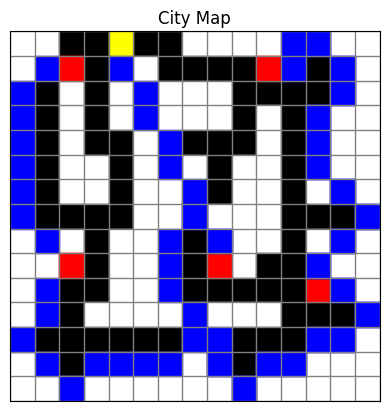

In [10]:
# Choosing maze for drone
mazeCityNum = int(input('Please choosing maze, enter 1 or 2 or 3: '))

# Get maze, initialState, goalState
maze, initialState, goalStates = main(mazeCityNum)

# If maze is existed
if maze is not None:
    path, costs = findingPath(maze, initialState, goalStates)

    # If path is found => visualize the map
    if path is not None:

        # Total cost of all path
        totalCost = 0
        for cost in costs:
            totalCost += cost

        # Output path and cost
        print(f'Path: {path}\n')
        print(f'Path length: {len(path)}\n')
        # print(f'Each cost path: {costs}\n')
        print(f'Path cost: {round(totalCost, 2)}\n') # Round number to two decimals

        # visualize
        # The time implementation would take long because of it is including animation time
        visualizeMap(maze, path)

## Analyze its efficiency

**Path cost:**
In each For loop, the code gets the path with the lowest cost in path list. Therefore, the total cost will be "the lowest cost plus the lowest cost and so on", which means the total cost of the path will also the lowest cost at the end.

**Execution time and Memory usage:**
During the calculating time or finding path are also use several For or While loop. This leads the execution time may take more time. Additionally, the memory was used to store many variable in loops that takes more places.

**Scalability:**
Beside these challenges, For and While loop could solve most of map type. The same meaning is that even in a simple map for a big complicated map, the code can also run and return an output as its expected.

**Optimality of solutions:**
Based on the Astar_maze_SOLUTION.py [8], some back up steps were added to handling some errors unexpected, such as an invalid point (x, y) or there is no way to reach the goal points, the code will stop to avoid the error messages and output the error problems.

# 6. References
[1] “Matplotlib Tutorial,” www.w3schools.com. https://www.w3schools.com/python/matplotlib_intro.asp

[2] “Python Math,” W3schools.com, 2024. https://www.w3schools.com/python/python_math.asp#gsc.tab=0

[3] “Euclidean distance,” Wikipedia, Apr. 01, 2019. https://en.wikipedia.org/wiki/Euclidean_distance

[4] “Pythagorean Theorem,” Wikipedia, Sep. 26, 2019. https://en.wikipedia.org/wiki/Pythagorean_theorem

[5] “Taxicab geometry,” Wikipedia, Jan. 21, 2022. https://en.wikipedia.org/wiki/Taxicab_geometry

[6] “Minkowski distance,” Wikipedia, Jan. 31, 2020. https://en.wikipedia.org/wiki/Minkowski_distance

[7]“Chebyshev distance,” Wikipedia, Mar. 21, 2021. https://en.wikipedia.org/wiki/Chebyshev_distance

[8] Mr. Nhat-Quang Tran, “Module: WEEK 04. Classical AI: Problem Solving by Searching,” rmit.instructure.com, 2019. https://rmit.instructure.com/courses/138595/pages/week-04-classical-ai-problem-solving-by-searching?module_item_id=6351799.